In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [36]:
data = pd.read_csv('train.csv')

In [37]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [38]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [39]:
data = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [40]:
data = data.drop('Arrival Delay in Minutes', axis=1)

In [41]:
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
Gender_Male                          0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [42]:
X = data.drop('satisfaction',axis=1)
y = data['satisfaction'].map({'satisfied':1,
                               'neutral or dissatisfied':0
                              })

In [43]:
data['Gender_Male'] = data['Gender_Male'].astype(int)
data['Customer Type_disloyal Customer'] = data['Customer Type_disloyal Customer'].astype(int)
data['Type of Travel_Personal Travel'] = data['Type of Travel_Personal Travel'].astype(int)
data['Class_Eco'] = data['Class_Eco'].astype(int)
data['Class_Eco Plus'] = data['Class_Eco Plus'].astype(int)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
]) # Output layer for binary classification
                 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # For binary classification
              metrics=['accuracy']) 
model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)
              

Epoch 1/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8774 - loss: 0.2941 - val_accuracy: 0.9347 - val_loss: 0.1597
Epoch 2/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9384 - loss: 0.1513 - val_accuracy: 0.9451 - val_loss: 0.1349
Epoch 3/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9477 - loss: 0.1290 - val_accuracy: 0.9526 - val_loss: 0.1213
Epoch 4/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9529 - loss: 0.1140 - val_accuracy: 0.9506 - val_loss: 0.1132
Epoch 5/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9573 - loss: 0.1050 - val_accuracy: 0.9566 - val_loss: 0.1042
Epoch 6/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9577 - loss: 0.0996 - val_accuracy: 0.9591 - val_loss: 0.1024
Epoch 7/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9571 - loss: 0.0973 - val_accuracy: 0.9604 - val_loss: 0.0981
Epoch 8/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9604 - loss: 0.0927 - 

In [48]:
loss, accuracy = model.evaluate(x_train,y_train)
print(f'Loss: {loss} accuracy: {accuracy}')

2273/2273 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9697 - loss: 0.0707
Loss: 0.0752342939376831 accuracy: 0.9680745601654053


In [49]:
pred = model.predict(x_test)

975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [55]:
pred_ = (pred > 0.5).astype(int)
val = confusion_matrix(y_test,pred_)

In [73]:
print(f'model{pred[1:3]}')
print('-----------')
print(f'model_int{pred_[1:3]}')

model[[4.1963307e-07]
 [1.8641481e-04]]
-----------
model_int[[0]
 [0]]


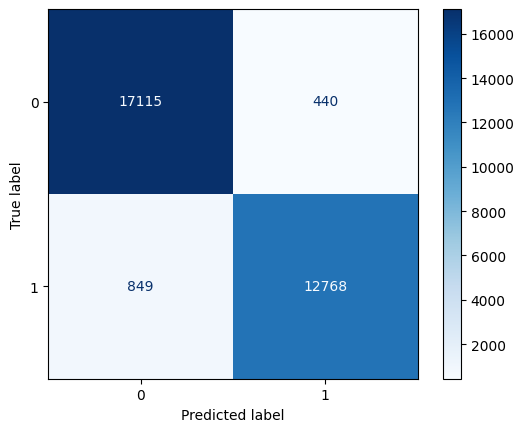

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=val)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [86]:
print(f'{classification_report(y_test,pred_)}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17555
           1       0.97      0.94      0.95     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



In [89]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9670 - loss: 0.0727 - val_accuracy: 0.9595 - val_loss: 0.0986
Epoch 2/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9673 - loss: 0.0746 - val_accuracy: 0.9541 - val_loss: 0.1005
Epoch 3/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.0737 - val_accuracy: 0.9600 - val_loss: 0.0967
Epoch 4/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.0705 - val_accuracy: 0.9622 - val_loss: 0.0983
Epoch 5/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9701 - loss: 0.0700 - val_accuracy: 0.9586 - val_loss: 0.0997
Epoch 6/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9696 - loss: 0.0696 - val_accuracy: 0.9614 - val_loss: 0.0991
Epoch 7/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9701 - loss: 0.0689 - val_accuracy: 0.9550 - val_loss: 0.1000
Epoch 8/20
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9696 - loss: 0.0684 - 

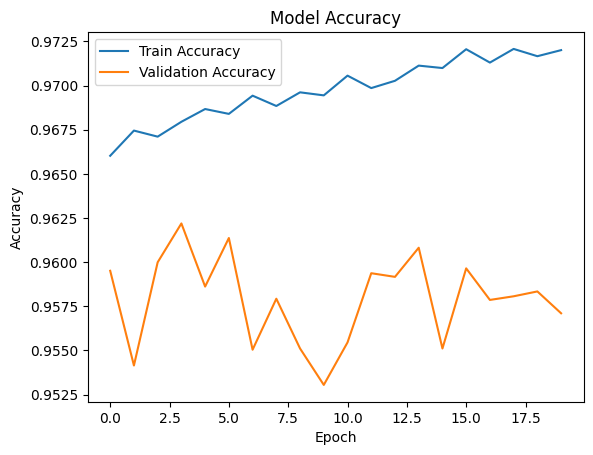

In [90]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

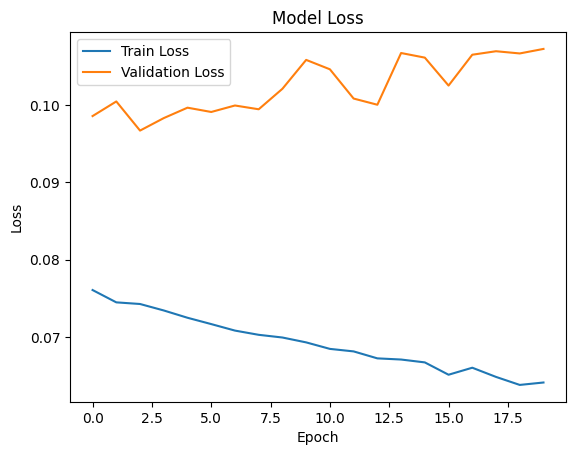

In [91]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [92]:
from keras.models import load_model

model.save('Neural_Network.h5')

In [104]:
m1 = model.save_weights('model_weight.weights.h5')

In [105]:
# Load the entire model (architecture + weights)
model = load_model('Neural_Network.h5')

In [108]:
model.load_weights('model_weight.weights.h5')